# Boundary value problem

### In general case:

$L[y]=y''+p(x)y+q(x)y=f(x)$

$l_a[y]=\alpha_0y(a)+\alpha_1y'(a)=A$

$l_b[y]=\beta_0y(b)+\beta_1y'(b)=B$

for $x\in[a,b]$

## 1. Consider the following boundary value problem:

$\frac{d^2y}{dx^2}-\frac{dy}{dx}\ln(x)-2y=1$ for $x \in [0.5,1.5]$

### with the boundary conditions:

$y(0.5)+y'(0.5)=1$, $y(1.5)-y'(1.5)=0$

1.1. Solve this problem using finite difference method of the second order. Use the uniform grid. Is this method stable for step size $h=0.125$? Find number of grid points required to achieve accuracy of the order of 1e-6.

### *Don't forget to include the boundary conditions!*

1.2. Use the first order one-sided numerical approximation for the first derivative and write a new scheme. Find number of grid points required to achieve accuracy of the order of 1e-6.

1.3. Plot the solutions of both methods on the same figure. Compare results and discuss differences (if occurs).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

#1.1.
def SecondOrderScheme(a,b,A,B,alpha,beta,p,q,f,N=100):
    # in:
    # a,b - float, limits of x, N - int, number of grid points
    # A,B - float, boundary values
    # alpha, beta - array of float, coefficients for boundary conditions in general case
    # p(x), g(x), f(x) - functions from general equation
    
    #you can construct matrix of the system and use scipy.linalg.solve method to solve it: y=solve(M,f)
    
    # out: 
    # y - array of float, solution of the BVP
    x = np.linspace(a,b,N)
    f = f(x)
    q = q(x)
    p = p(x)
    l = np.zeros(N)
    h = (b-a)/(N-1)
    M = np.zeros((N,N))
    M[0,0]= alpha[0]-3/2*alpha[1]/h
    M[0,1]=2*alpha[1]/h
    M[0,2]= -alpha[1]/2/h
    for i in range(1,N-1):
        M[i,i-1] = (1-h/2*p[i])
        M[i,i]= -(2-h**2*q[i])
        M[i,i+1] = (1+h/2*p[i])
    M[N-1,N-1]= beta[0]+beta[1]*3/2/h
    M[N-1,N-2] = -2*beta[1]/h
    M[N-1,N-3] = beta[1]*1/2/h
    l[0]= A
    for j in range(1,N-1):
        l[j] = h**2*f[j]
    l[N-1]= B
    y = solve(M,l)
    return y

#1.2.
def FirstOrderScheme(a,b,A,B,alpha,beta,p,q,f,N=100):
    # in:
    # a,b - float, limits of x, N - int, number of grid points
    # A,B - float, boundary values
    # alpha, beta - array of float, coefficients for boundary conditions in general case
    # p(x), g(x), f(x) - functions from general equation
    
    #you can construct matrix of the system and use scipy.linalg.solve method to solve it: y=solve(M,f)
    
    # out: 
    # y - array of float, solution of the BVP
    return y

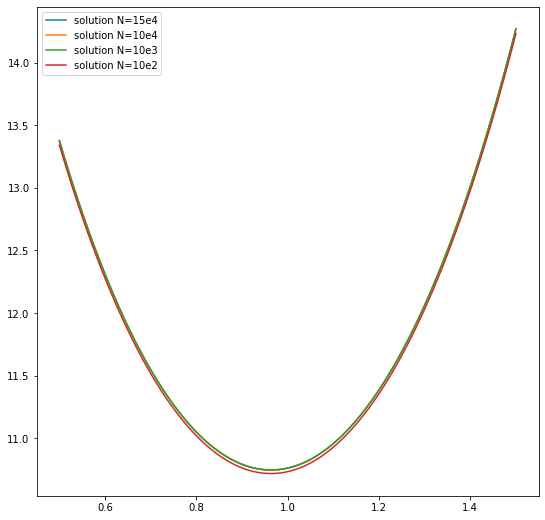

In [16]:
def p(x):
    return -np.log(x)
def q(x):
    return -2*np.ones_like(x)
def f(x):
    return 1*np.ones_like(x)
yy_ = SecondOrderScheme(1/2,3/2,1,0,[1,1],[1,-1],p,q,f,N=15000) 
y = SecondOrderScheme(1/2,3/2,1,0,[1,1],[1,-1],p,q,f,N=10000)
yy = SecondOrderScheme(1/2,3/2,1,0,[1,1],[1,-1],p,q,f,N=1000)
y_ = SecondOrderScheme(1/2,3/2,1,0,[1,1],[1,-1],p,q,f,N=100)
xx_ = np.linspace(1/2,3/2,15000)
x = np.linspace(1/2,3/2,10000)
xx = np.linspace(1/2,3/2,1000)
x_ = np.linspace(1/2,3/2,100)
plt.figure(figsize=(9,9))
plt.plot(xx_,yy_,label= 'solution N=1.5e4')
plt.plot(x,y,label= 'solution N=1e4')
plt.plot(xx,yy,label= 'solution N=1e3')
plt.plot(x_,y_,label = 'solution N=1e2')
plt.legend()


In [19]:
print(abs(max(y_)-max(yy))) #1e2 and 1e3 difference
print(abs(max(yy)-max(y))) #1e3 and 1e4 difference
print(abs(max(yy_)-max(y)))#1e4 and 1.5e4 difference --- our choice

0.03675347621854286
0.00036994842842830167
1.8661674587860944e-06


# 2. Consider the following boundary value problem:

$\frac{d^2y}{dx^2}+2\frac{dy}{dx}-3xy=\frac{2-8x}{x^3}$ for $x \in [1,2]$

### with the boundary conditions:

$y(1)=1$, $y(2)=0.5$

2.1. Solve this problem using finite difference method of the second order. Find number of grid points required to achieve accuracy of the order of 1e-6.

2.2. Solve this problem using Galerkin method with power basis functions. Find number of grid points required to achieve accuracy of the order of 1e-6.

2.3. Plot the solutions of both methods on the same figure. Compare results and discuss differences (if occurs).